In [29]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt 

In [2]:
%matplotlib inline

In [16]:
df = pd.read_excel('/Users/KP/Desktop/Training/Summer 2017 PyData Toronto/pydata_sept2016-master/data/Subway & SRT Logs (Jan01_14 to June 30_17).xlsx')

In [18]:
df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386


In [15]:
df.isnull().sum()

Date             0
Time             0
Day              0
Station          0
Code             0
Min Delay        0
Min Gap          0
Bound        15452
Line           297
Vehicle          0
datetime         0
dtype: int64

In [68]:
df = df.dropna().copy()

In [69]:
df1 = df[df['Min Delay'] != 999]

In [77]:
df1.describe()

,Min Delay,Min Gap,Vehicle
count,56727.000000,56727.000000,56727.000000
mean,2.302431,3.400462,5089.055935
std,8.940514,8.788149,1260.535270
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5118.000000
50%,0.000000,0.000000,5296.000000
75%,3.000000,6.000000,5631.000000
max,788.000000,600.000000,72537.000000


In [98]:
df2 = df1[df1['Station'].str.contains('STATION')].copy()

In [99]:
df2.shape

(56071, 10)

In [100]:
df2['Min Delay'].mean()

2.3139947566478214

In [101]:
df2['Min Delay'].max()

788

In [102]:
df2['Min Delay'].median()

0.0

In [103]:
delay = df2['Min Delay'].values

(array([  3.67380000e+04,   1.03330000e+04,   5.32600000e+03,
          1.13400000e+03,   1.08200000e+03,   3.51000000e+02,
          3.40000000e+02,   1.62000000e+02,   1.04000000e+02,
          6.90000000e+01,   7.80000000e+01,   3.50000000e+01,
          4.70000000e+01,   3.00000000e+01,   3.20000000e+01,
          1.70000000e+01,   1.50000000e+01,   8.00000000e+00,
          1.80000000e+01,   9.00000000e+00]),
 array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
         22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
         45. ,  47.5,  50. ]),
 <a list of 20 Patch objects>)

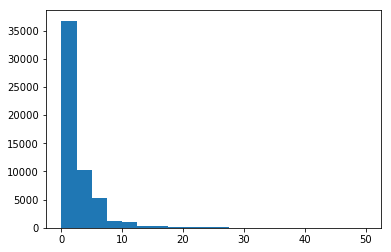

In [104]:
plt.hist(delay, bins = 20, range = (0,50))

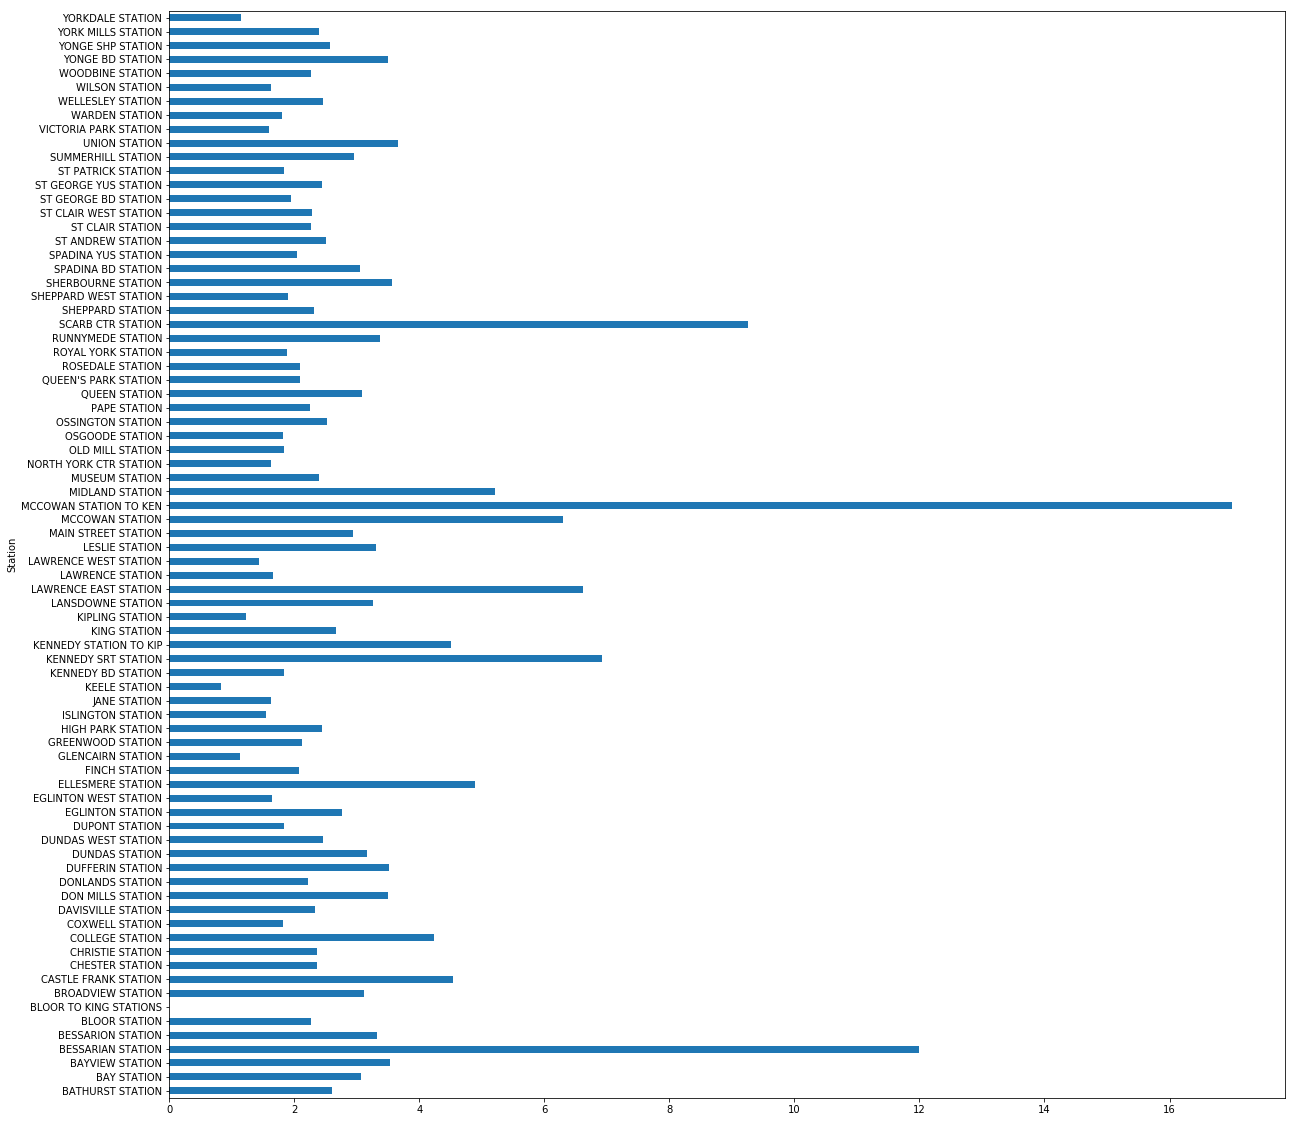

In [115]:
df2.groupby('Station')['Min Delay'].mean().plot(kind = 'barh',  figsize = (20,20))

In [106]:
long_delay = df2[df2['Min Delay'] >= 30]

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
463,2014-01-09,05:43,Thursday,KENNEDY BD STATION,PUTWZ,38,42,W,BD,5901
484,2014-01-09,09:52,Thursday,SPADINA YUS STATION,SUUT,33,36,S,YU,5736
642,2014-01-11,20:51,Saturday,MCCOWAN STATION TO KEN,MRWEA,292,298,S,SRT,3014
982,2014-01-19,00:11,Sunday,DUNDAS WEST STATION,MUPLB,31,36,E,BD,5039
1313,2014-01-24,10:22,Friday,OSGOODE STATION,MUPR1,59,63,S,YU,5546
1408,2014-01-26,16:55,Sunday,DUFFERIN STATION,MUPR1,112,117,E,BD,5131
1547,2014-01-28,11:21,Tuesday,ISLINGTON STATION,MUPLB,53,57,W,BD,5915
1550,2014-01-28,12:18,Tuesday,CHRISTIE STATION,MUPR1,54,57,E,BD,5850
1706,2014-01-30,19:26,Thursday,QUEEN'S PARK STATION,MUPLB,35,39,S,YU,5831


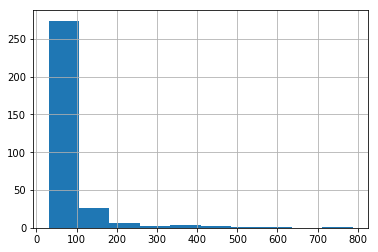

In [107]:
long_delay 
long_delay['Min Delay'].hist()

In [108]:
long_delay.groupby('Station')['Min Delay'].mean()

Station
BATHURST STATION           68.000000
BAY STATION                48.000000
BAYVIEW STATION            58.400000
BLOOR STATION              39.833333
BROADVIEW STATION          51.000000
CASTLE FRANK STATION       67.375000
CHESTER STATION            51.333333
CHRISTIE STATION           54.000000
COLLEGE STATION           134.142857
COXWELL STATION            69.000000
DAVISVILLE STATION         40.142857
DON MILLS STATION          87.142857
DONLANDS STATION           59.500000
DUFFERIN STATION           71.000000
DUNDAS STATION             50.833333
DUNDAS WEST STATION       131.250000
DUPONT STATION            119.000000
EGLINTON STATION           53.714286
EGLINTON WEST STATION      53.714286
ELLESMERE STATION          33.000000
FINCH STATION             126.166667
GREENWOOD STATION          32.000000
HIGH PARK STATION          32.000000
ISLINGTON STATION          53.500000
JANE STATION              132.833333
KEELE STATION              61.333333
KENNEDY BD STATION         83.

In [31]:
codes = pd.read_excel('/Users/KP/Desktop/Training/Summer 2017 PyData Toronto/pydata_sept2016-master/data/Subway & SRT Log Codes.xlsx')

In [6]:
codes.head()

,Unnamed: 0,Unnamed: 1,SUB RMENU CODE,CODE DESCRIPTION,Unnamed: 4,Unnamed: 5,SRT RMENU CODE,CODE DESCRIPTION.1
0,NaN,1,EUAC,Air Conditioning,NaN,1.0,ERAC,Air Conditioning
1,NaN,2,EUAL,Alternating Current,NaN,2.0,ERBO,Body
2,NaN,3,EUBK,Brakes,NaN,3.0,ERCD,Consequential Delay (2nd Delay Same Fault)
3,NaN,4,EUBO,Body,NaN,4.0,ERCO,Couplers
4,NaN,5,EUCA,Compressed Air,NaN,5.0,ERDB,Disc Brakes


In [7]:
df.shape

(72218, 10)

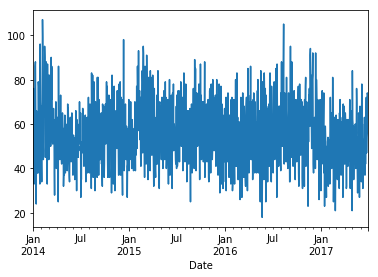

In [8]:
df.set_index('Date').groupby(pd.Grouper(freq='D'))['Vehicle'].count().plot()

In [9]:
df.dtypes

Date         datetime64[ns]
Time                 object
Day                  object
Station              object
Code                 object
Min Delay             int64
Min Gap               int64
Bound                object
Line                 object
Vehicle               int64
dtype: object

In [10]:
df['Date'].astype('str')

0        2014-01-01
1        2014-01-01
2        2014-01-01
3        2014-01-01
4        2014-01-01
5        2014-01-01
6        2014-01-01
7        2014-01-01
8        2014-01-01
9        2014-01-01
10       2014-01-01
11       2014-01-01
12       2014-01-01
13       2014-01-01
14       2014-01-01
15       2014-01-01
16       2014-01-01
17       2014-01-01
18       2014-01-01
19       2014-01-01
20       2014-01-01
21       2014-01-01
22       2014-01-01
23       2014-01-01
24       2014-01-01
25       2014-01-01
26       2014-01-01
27       2014-01-01
28       2014-01-01
29       2014-01-01
            ...    
72188    2017-06-30
72189    2017-06-30
72190    2017-06-30
72191    2017-06-30
72192    2017-06-30
72193    2017-06-30
72194    2017-06-30
72195    2017-06-30
72196    2017-06-30
72197    2017-06-30
72198    2017-06-30
72199    2017-06-30
72200    2017-06-30
72201    2017-06-30
72202    2017-06-30
72203    2017-06-30
72204    2017-06-30
72205    2017-06-30
72206    2017-06-30


In [11]:
df['datetime'] = pd.to_datetime(df['Date'].astype('str') + ' ' + df['Time'])

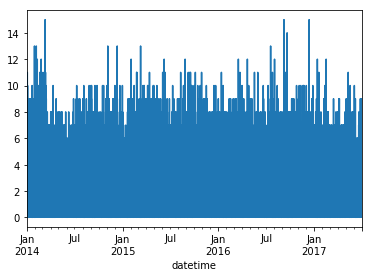

In [12]:
df.set_index('datetime').groupby(pd.Grouper(freq='H'))['Vehicle'].count().plot()

In [13]:
df.set_index('datetime').groupby(pd.Grouper(freq='15min'))['Vehicle'].count()

datetime
2014-01-01 00:15:00    1
2014-01-01 00:30:00    0
2014-01-01 00:45:00    0
2014-01-01 01:00:00    0
2014-01-01 01:15:00    0
2014-01-01 01:30:00    0
2014-01-01 01:45:00    0
2014-01-01 02:00:00    1
2014-01-01 02:15:00    0
2014-01-01 02:30:00    1
2014-01-01 02:45:00    0
2014-01-01 03:00:00    1
2014-01-01 03:15:00    2
2014-01-01 03:30:00    0
2014-01-01 03:45:00    0
2014-01-01 04:00:00    0
2014-01-01 04:15:00    0
2014-01-01 04:30:00    0
2014-01-01 04:45:00    0
2014-01-01 05:00:00    0
2014-01-01 05:15:00    0
2014-01-01 05:30:00    0
2014-01-01 05:45:00    0
2014-01-01 06:00:00    0
2014-01-01 06:15:00    0
2014-01-01 06:30:00    0
2014-01-01 06:45:00    0
2014-01-01 07:00:00    0
2014-01-01 07:15:00    0
2014-01-01 07:30:00    4
                      ..
2017-06-30 16:30:00    0
2017-06-30 16:45:00    0
2017-06-30 17:00:00    1
2017-06-30 17:15:00    2
2017-06-30 17:30:00    1
2017-06-30 17:45:00    0
2017-06-30 18:00:00    0
2017-06-30 18:15:00    0
2017-06-30 18:30

In [37]:
x = df.set_index('datetime').groupby(pd.Grouper(freq='D'))['Vehicle'].transform(lambda x: x.index)
x.index = df.index

In [38]:
dfx

0       2014-01-01 00:21:00
1       2014-01-01 02:06:00
2       2014-01-01 02:40:00
3       2014-01-01 03:10:00
4       2014-01-01 03:20:00
5       2014-01-01 03:29:00
6       2014-01-01 07:31:00
7       2014-01-01 07:32:00
8       2014-01-01 07:34:00
9       2014-01-01 07:34:00
10      2014-01-01 07:53:00
11      2014-01-01 08:20:00
12      2014-01-01 08:48:00
13      2014-01-01 08:49:00
14      2014-01-01 08:53:00
15      2014-01-01 08:55:00
16      2014-01-01 08:58:00
17      2014-01-01 09:00:00
18      2014-01-01 09:00:00
19      2014-01-01 09:01:00
20      2014-01-01 09:10:00
21      2014-01-01 09:23:00
22      2014-01-01 09:27:00
23      2014-01-01 09:32:00
24      2014-01-01 09:38:00
25      2014-01-01 09:38:00
26      2014-01-01 10:25:00
27      2014-01-01 10:52:00
28      2014-01-01 11:04:00
29      2014-01-01 11:20:00
                ...        
72188   2017-06-30 13:42:00
72189   2017-06-30 13:57:00
72190   2017-06-30 14:06:00
72191   2017-06-30 14:35:00
72192   2017-06-30 1